In [12]:
import matplotlib.pyplot as plt #Library untuk visualisasi data.
%matplotlib inline

from skimage import data #Library untuk mengakses data citra bawaan.
from skimage.io import imread  #untuk membaca citra dari file ke dalam variabel
from skimage.color import rgb2gray #untuk mengkonversi citra berwarna (RGB) menjadi citra grayscale
import numpy as np #unyuk melakukan operasi dan manipulasi array atau matriks dalam bahasa python

Shape citra 1 :  (252, 250)
Shape citra 1 :  (312, 250)


Text(0.5, 1.0, 'Citra 2')

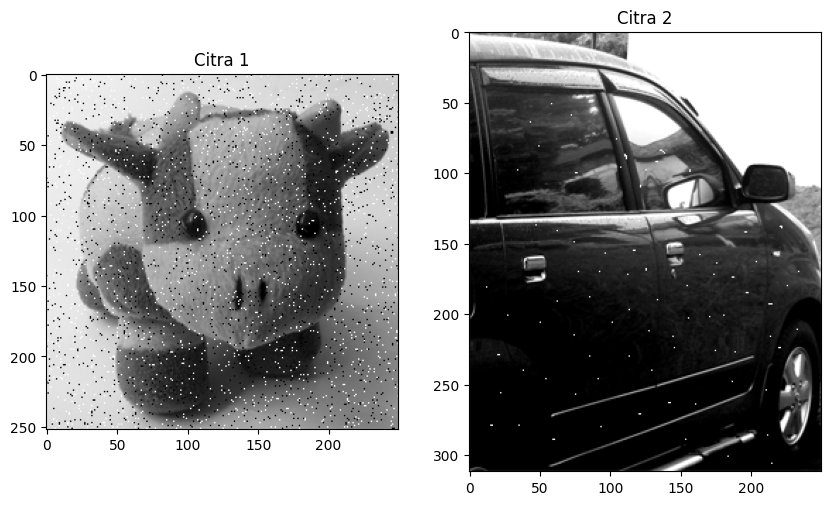

In [13]:
citra1 = imread(fname="boneka2.tif") #untuk membaca citra dan menyimpan dalam variabel
citra2 = imread(fname="mobil.tif")#untuk membaca citra dan menyimpan dalam variabel

print('Shape citra 1 : ', citra1.shape) #digunakan untuk mendapatkan dimensi citra yaitu jumlah baris, jumlah kolom, dan jumlah saluran citra
print('Shape citra 1 : ', citra2.shape) #digunakan untuk mendapatkan dimensi citra yaitu jumlah baris, jumlah kolom, dan jumlah saluran citra

fig, axes = plt.subplots(1, 2, figsize=(10, 10)) #Membuat subplot dengan 1 baris dan 2 kolom untuk menampilkan kedua citra secara berdampingan.
ax = axes.ravel() #Mengubah array 2 dimensi `axes` menjadi array 1 dimensi `ax` agar mudah diakses.

ax[0].imshow(citra1, cmap = 'gray') #untuk menampilkan citra dalam skala keabuan  
ax[0].set_title("Citra 1") #Mengatur judul subplot pertama menjadi "Citra 1".
ax[1].imshow(citra2, cmap = 'gray') #untuk menampilkan citra dalam skala keabuan.
ax[1].set_title("Citra 2") #Mengatur judul subplot kedua menjadi "Citra 2"

In [14]:
#%proses filter median untuk citra mobil
#for baris=2 : tinggiA-1
#    for kolom=2 : lebarA-1
#        dataA = [inputMobil(baris-1, kolom-1) inputMobil(baris-1, kolom) inputMobil(baris-1, kolom+1)  ...
#              inputMobil(baris, kolom-1) inputMobil(baris, kolom) inputMobil(baris, kolom+1)  ...
#              inputMobil(baris+1, kolom-1) inputMobil(baris+1, kolom) inputMobil(baris+1, kolom+1)];
#        % Urutkan
#        for i=1 : 8
#            for j=i+1 : 9
#                if dataA(i) > dataA(j)
#                    tmpA = dataA(i);
#                    dataA(i) = dataA(j);
#                    dataA(j) = tmpA;
#                end
#            end
#        end      
#        % Ambil nilai median
#        outputMobil(baris, kolom) = dataA(5);
#    end
#end

In [15]:

copyCitra1 = citra1.copy().astype(float) #Membuat salinan dari citra1 dan mengonversi tipe datanya menjadi float
copyCitra2 = citra2.copy().astype(float) #Membuat salinan dari citra2 dan mengonversi tipe datanya menjadi float. 

m1,n1 = copyCitra1.shape #Mendapatkan dimensi citra copyCitra1 
output1 = np.empty([m1, n1]) # untuk menyimpan hasil operasi pada citra.

m2,n2 = copyCitra2.shape #Mendapatkan dimensi citra copyCitra2
output2 = np.empty([m2, n2]) #Array ini akan digunakan untuk menyimpan hasil operasi pada citra.
print('Shape copy citra 1 : ', copyCitra1.shape) #Menampilkan dimensi copyCitra1, yaitu jumlah baris dan kolom citra
print('Shape output citra 1 : ', output1.shape) #Menampilkan dimensi output1, yaitu jumlah baris dan kolom array yang digunakan untuk menyimpan hasil operasi pada citra.

print('m1 : ',m1) #Menampilkan nilai m1, yaitu jumlah baris citra copyCitra1.
print('n1 : ',n1) #Menampilkan nilai n1, yaitu jumlah kolom citra copyCitra1.
print() 

print('Shape copy citra 2 : ', copyCitra2.shape) #Menampilkan dimensi copyCitra2, yaitu jumlah baris dan kolom citra.
print('Shape output citra 3 : ', output2.shape) #Menampilkan dimensi output2, yaitu jumlah baris dan kolom array yang digunakan untuk menyimpan hasil operasi pada citra.
print('m2 : ',m2) #Menampilkan nilai m2, yaitu jumlah baris citra copyCitra2.
print('n2 : ',n2) #Menampilkan nilai n2, yaitu jumlah kolom citra copyCitra2.
print()

Shape copy citra 1 :  (252, 250)
Shape output citra 1 :  (252, 250)
m1 :  252
n1 :  250

Shape copy citra 2 :  (312, 250)
Shape output citra 3 :  (312, 250)
m2 :  312
n2 :  250



In [16]:
for baris in range(0, m1-1): #Melakukan iterasi pada setiap baris citra.
    for kolom in range(0, n1-1): #Melakukan iterasi pada setiap kolom citra
        a1 = baris #Menyimpan nilai baris saat ini dalam variabel `a1` dan `b1` untuk penggunaan lebih lanjut.
        b1 = kolom #Menyimpan nilai kolom saat ini dalam variabel `a1` dan `b1` untuk penggunaan lebih lanjut.
        dataA = [copyCitra1[a1-1, b1-1], copyCitra1[a1-1, b1], copyCitra1[a1-1, b1+1], \
              copyCitra1[a1, b1-1], copyCitra1[a1, b1], copyCitra1[a1, b1+1], \
              copyCitra1[a1+1, b1-1], copyCitra1[a1+1, b1], copyCitra1[a1+1, b1+1]]
        
        # Urutkan
        for i in range(1, 8): #Melakukan iterasi pada setiap baris citra.
            for j in range(i, 9): #Melakukan iterasi pada setiap kolom citra
                if dataA[i] > dataA[j]:
                    tmpA = dataA[i];
                    dataA[i] = dataA[j];
                    dataA[j]= tmpA;
        
        output1[a1, b1] = dataA[5]

In [17]:
for baris in range(0, m2-1): #Melakukan iterasi pada setiap baris citra.
    for kolom in range(0, n2-1): #Melakukan iterasi pada setiap kolom citra
        a1 = baris #Menyimpan nilai baris saat ini dalam variabel `a1` dan `b1` untuk penggunaan lebih lanjut.
        b1 = kolom #Menyimpan nilai kolom saat ini dalam variabel `a1` dan `b1` untuk penggunaan lebih lanjut.
        dataA = [copyCitra2[a1-1, b1-1], copyCitra2[a1-1, b1], copyCitra2[a1-1, b1+1], \
              copyCitra2[a1, b1-1], copyCitra2[a1, b1], copyCitra2[a1, b1+1], \
              copyCitra2[a1+1, b1-1], copyCitra2[a1+1, b1], copyCitra2[a1+1, b1+1]]
        
        # Urutkan
        for i in range(1, 8): #Melakukan iterasi pada setiap baris citra.
            for j in range(i, 9): #Melakukan iterasi pada setiap kolom citra
                if dataA[i] > dataA[j]:
                    tmpA = dataA[i];
                    dataA[i] = dataA[j];
                    dataA[j]= tmpA;
        
        output2[a1, b1] = dataA[5]

Text(0.5, 1.0, 'Output Citra 2')

c:\Python\Python310\lib\site-packages\matplotlib\image.py:484: RuntimeWarning: invalid value encountered in subtract
  A_scaled -= a_min
c:\Python\Python310\lib\site-packages\matplotlib\image.py:455: RuntimeWarning: overflow encountered in scalar multiply
  newmin = vmid - dv * fact
c:\Python\Python310\lib\site-packages\matplotlib\image.py:460: RuntimeWarning: overflow encountered in scalar multiply
  newmax = vmid + dv * fact


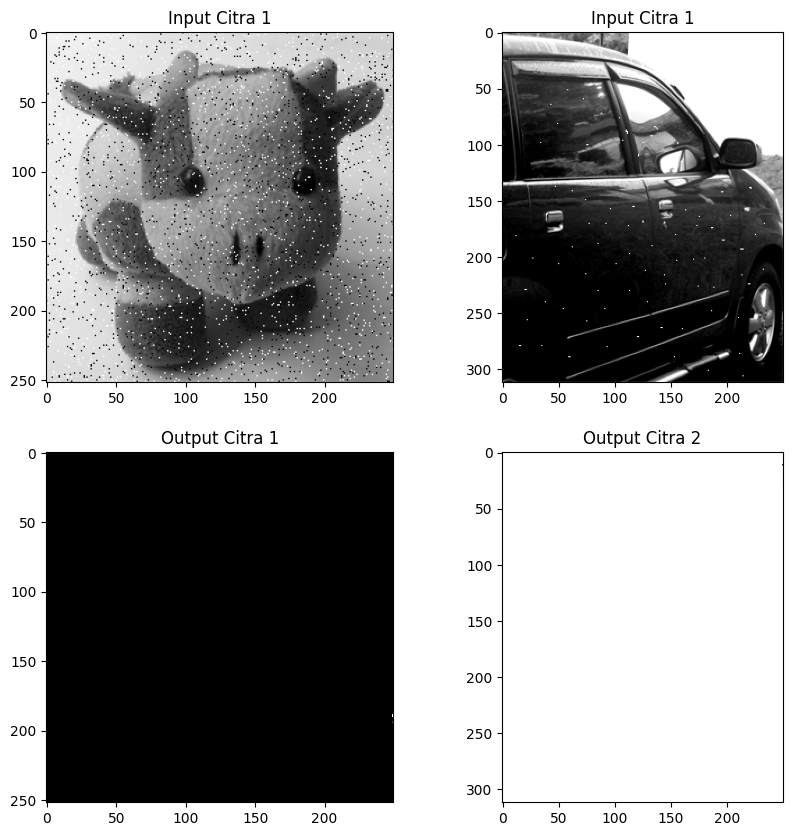

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(citra1, cmap = 'gray') #menampilkan citra 1 pada subplot pertama
ax[0].set_title("Input Citra 1") #mengatur judul

ax[1].imshow(citra2, cmap = 'gray') #menampilkan citra 2 pada subplot pertama
ax[1].set_title("Input Citra 1") #mengatur judul

ax[2].imshow(output1, cmap = 'gray') #menampilkan citra 3 pada subplot pertama
ax[2].set_title("Output Citra 1") #mengatur judul

ax[3].imshow(output2, cmap = 'gray') #menampilkan citra 4 pada subplot pertama
ax[3].set_title("Output Citra 2")  #mengatur judul